In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

2022-03-21 12:59:44.705668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 12:59:44.705738: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data = pd.read_csv('cleveland_final.csv')
data.head()

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
0,63,1,1,145,1,233,50,20,1,-9,...,1,1,1,1,1,1,1,1,1,1
1,67,1,4,160,1,286,40,40,0,-9,...,1,2,2,2,1,1,1,1,1,1
2,67,1,4,120,1,229,20,35,0,-9,...,1,1,1,1,1,2,2,1,7,3
3,37,1,3,130,0,250,0,0,0,-9,...,1,1,1,1,1,1,1,1,1,1
4,41,0,2,130,1,204,0,0,0,-9,...,1,1,1,1,1,1,1,1,1,1


In [4]:
data.describe()

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000
mean,54.411348,0.677305,3.163121,131.563830,0.617021,249.092199,16.460993,14.829787,0.148936,-8.184397,...,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759,1.127660,1.134752,1.411348,1.14539
std,9.053083,0.468338,0.955405,17.757496,0.486977,51.217546,19.580300,15.564563,0.356658,2.741802,...,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576,0.334304,0.766002,1.439508,0.44257
min,29.000000,0.000000,1.000000,94.000000,0.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
50%,55.000000,1.000000,3.000000,130.000000,1.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
75%,61.000000,1.000000,4.000000,140.000000,1.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,77.000000,1.000000,4.000000,200.000000,1.000000,564.000000,99.000000,54.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,4.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   htn       282 non-null    int64  
 5   chol      282 non-null    int64  
 6   cigs      282 non-null    int64  
 7   years     282 non-null    int64  
 8   fbs       282 non-null    int64  
 9   dm        282 non-null    int64  
 10  famhist   282 non-null    int64  
 11  restecg   282 non-null    int64  
 12  ekgmo     282 non-null    int64  
 13  ekgday    282 non-null    int64  
 14  ekgyr     282 non-null    int64  
 15  dig       282 non-null    int64  
 16  prop      282 non-null    int64  
 17  nitr      282 non-null    int64  
 18  pro       282 non-null    int64  
 19  diuretic  282 non-null    int64  
 20  thaldur   282 non-null    float6

In [6]:
print("The shape of dataset: ", data.shape)

The shape of dataset:  (282, 50)


In [7]:
print("Displaying NA values in each columns: ")
data.isna().sum(axis=0)

Displaying NA values in each columns: 


age         0
sex         0
cp          0
trestbps    0
htn         0
chol        0
cigs        0
years       0
fbs         0
dm          0
famhist     0
restecg     0
ekgmo       0
ekgday      0
ekgyr       0
dig         0
prop        0
nitr        0
pro         0
diuretic    0
thaldur     0
thaltime    0
met         0
thalach     0
thalrest    0
tpeakbps    0
tpeakbpd    0
dummy       0
trestbpd    0
exang       0
xhypo       0
oldpeak     0
slope       0
rldv5e      0
ca          0
thal        0
cmo         0
cday        0
cyr         0
num         0
lmt         0
ladprox     0
laddist     0
cxmain      0
om1         0
rcaprox     0
rcadist     0
lvx3        0
lvx4        0
lvf         0
dtype: int64

In [8]:
print("Displaying NULL values in each columns: ")
data.isnull().sum()

Displaying NULL values in each columns: 


age         0
sex         0
cp          0
trestbps    0
htn         0
chol        0
cigs        0
years       0
fbs         0
dm          0
famhist     0
restecg     0
ekgmo       0
ekgday      0
ekgyr       0
dig         0
prop        0
nitr        0
pro         0
diuretic    0
thaldur     0
thaltime    0
met         0
thalach     0
thalrest    0
tpeakbps    0
tpeakbpd    0
dummy       0
trestbpd    0
exang       0
xhypo       0
oldpeak     0
slope       0
rldv5e      0
ca          0
thal        0
cmo         0
cday        0
cyr         0
num         0
lmt         0
ladprox     0
laddist     0
cxmain      0
om1         0
rcaprox     0
rcadist     0
lvx3        0
lvx4        0
lvf         0
dtype: int64

In [9]:
data = data.dropna()

data.shape

(282, 50)

In [10]:
data = data.sample(frac=1)
data.head()

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
156,51,1,4,140,1,299,30,30,0,-9,...,1,1,1,1,1,1,2,1,1,1
108,61,1,4,120,1,260,10,20,0,-9,...,1,2,1,2,1,1,1,1,1,1
172,59,0,4,174,1,249,0,0,0,1,...,1,1,1,1,2,1,1,5,7,1
251,58,1,4,146,0,218,40,20,0,-9,...,1,2,1,1,1,1,1,1,1,1
225,34,0,2,118,1,210,10,15,0,-9,...,1,1,1,1,1,1,1,1,1,1


In [11]:
X_df = data.copy()
Y_df = X_df.pop('num')

print('X Values')
display(X_df)
print('Y Values')
display(Y_df)

print('Shape of X:', X_df.shape)
print('Shape of Y:', Y_df.shape)

X Values


,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
156,51,1,4,140,1,299,30,30,0,-9,...,1,1,1,1,1,1,2,1,1,1
108,61,1,4,120,1,260,10,20,0,-9,...,1,2,1,2,1,1,1,1,1,1
172,59,0,4,174,1,249,0,0,0,1,...,1,1,1,1,2,1,1,5,7,1
251,58,1,4,146,0,218,40,20,0,-9,...,1,2,1,1,1,1,1,1,1,1
225,34,0,2,118,1,210,10,15,0,-9,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,68,1,3,118,1,277,2,-9,0,-9,...,1,1,1,1,1,1,1,1,1,1
63,54,0,3,135,0,304,60,30,1,-9,...,1,1,1,1,1,1,1,1,1,1
279,58,0,4,130,1,197,0,0,0,-9,...,1,1,1,1,1,1,1,1,1,1
120,48,1,4,130,1,256,60,15,1,1,...,1,2,1,1,2,1,2,1,1,1


Y Values


156    1
108    2
172    1
251    1
225    0
      ..
159    0
63     0
279    0
120    3
43     0
Name: num, Length: 282, dtype: int64

Shape of X: (282, 49)
Shape of Y: (282,)


In [12]:
Y_labels = pd.get_dummies(Y_df, prefix='Label')

print('All Labels:')
display(Y_labels)

All Labels:


,Label_0,Label_1,Label_2,Label_3,Label_4
156,0,1,0,0,0
108,0,0,1,0,0
172,0,1,0,0,0
251,0,1,0,0,0
225,1,0,0,0,0
...,...,...,...,...,...
159,1,0,0,0,0
63,1,0,0,0,0
279,1,0,0,0,0
120,0,0,0,1,0


In [13]:
X_stats = X_df.describe()
X_stats = X_stats.transpose()
display(X_stats)

,count,mean,std,min,25%,50%,75%,max
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.000,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.000,1.0
cp,282.0,3.163121,0.955405,1.0,3.00,3.0,4.000,4.0
trestbps,282.0,131.563830,17.757496,94.0,120.00,130.0,140.000,200.0
htn,282.0,0.617021,0.486977,0.0,0.00,1.0,1.000,1.0
chol,282.0,249.092199,51.217546,126.0,213.00,244.0,277.000,564.0
cigs,282.0,16.460993,19.580300,-9.0,0.00,10.0,30.000,99.0
years,282.0,14.829787,15.564563,-9.0,0.00,15.0,30.000,54.0
fbs,282.0,0.148936,0.356658,0.0,0.00,0.0,0.000,1.0
dm,282.0,-8.184397,2.741802,-9.0,-9.00,-9.0,-9.000,1.0


In [14]:
# Normalisation Steps

X_norm = (X_df - X_stats['mean'])/X_stats['std']

X_norm

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
156,-0.376816,0.689021,0.875942,0.475077,0.786440,0.974428,0.691461,0.974664,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,2.609426,-0.175916,-0.285756,-0.328513
108,0.727780,0.689021,0.875942,-0.651208,0.786440,0.212970,-0.329974,0.332178,-0.417588,-0.297470,...,-0.210444,2.455310,-0.507947,2.321618,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
172,0.506861,-1.446187,0.875942,2.389761,0.786440,-0.001800,-0.840692,-0.952792,-0.417588,3.349767,...,-0.210444,-0.405836,-0.507947,-0.429207,2.261027,-0.457771,-0.381867,5.046001,3.882335,-0.328513
251,0.396401,0.689021,0.875942,0.812962,-1.267043,-0.607061,1.202178,0.332178,-0.417588,-0.297470,...,-0.210444,2.455310,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
225,-2.254630,-1.446187,-1.217411,-0.763837,0.786440,-0.763258,-0.329974,0.010936,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.500997,0.689021,-0.170734,-0.763837,0.786440,0.544888,-0.738548,-1.531028,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
63,-0.045437,-1.446187,-0.170734,0.193505,-1.267043,1.072051,2.223613,0.974664,2.386215,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
279,0.396401,-1.446187,0.875942,-0.088066,0.786440,-1.017077,-0.840692,-0.952792,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
120,-0.708195,0.689021,0.875942,-0.088066,0.786440,0.134872,2.223613,0.010936,2.386215,3.349767,...,-0.210444,2.455310,-0.507947,-0.429207,2.261027,-0.457771,2.609426,-0.175916,-0.285756,-0.328513


In [15]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(X_norm, Y_labels, test_size=0.2)

print("Size of x_train: ", x_train.shape)
print("Size of y_train: ", y_train.shape)
print("Size of x_test_valid: ", x_test_valid.shape)
print("Size of y_test_valid: ", y_test_valid.shape)

print("X Train Data")
display(x_train.head())
print("Y Train Data")
display(y_train.head())
print("X Test Validation Data")
display(x_test_valid.head())
print("Y Test Validation Data")
display(y_test_valid.head())

Size of x_train:  (225, 49)
Size of y_train:  (225, 5)
Size of x_test_valid:  (57, 49)
Size of y_test_valid:  (57, 5)
X Train Data


,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
223,-0.155897,0.689021,0.875942,-0.482266,-1.267043,0.642510,-0.840692,-0.952792,-0.417588,-0.29747,...,-0.210444,-0.405836,1.961727,2.321618,2.261027,-0.457771,2.609426,-0.175916,-0.285756,-0.328513
276,1.280078,-1.446187,-0.170734,0.812962,-1.267043,0.564412,-0.840692,-0.952792,-0.417588,-0.29747,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
171,-0.155897,0.689021,0.875942,0.587705,0.786440,-0.450865,1.202178,0.974664,-0.417588,-0.29747,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
162,-0.045437,-1.446187,-0.170734,-1.214351,0.786440,-0.685160,-0.840692,-0.952792,-0.417588,-0.29747,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
135,0.065022,-1.446187,-1.217411,0.193505,-1.267043,0.017724,0.691461,0.974664,-0.417588,-0.29747,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513


Y Train Data


,Label_0,Label_1,Label_2,Label_3,Label_4
223,0,0,0,1,0
276,1,0,0,0,0
171,1,0,0,0,0
162,1,0,0,0,0
135,1,0,0,0,0


X Test Validation Data


,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
80,-1.039574,0.689021,0.875942,-1.552236,0.786440,-0.802307,1.202178,1.295906,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
116,0.396401,0.689021,-0.170734,0.475077,-1.267043,-0.743733,-0.840692,-0.952792,2.386215,3.349767,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
146,0.285942,0.689021,0.875942,1.882933,-1.267043,0.779182,2.734330,1.488652,2.386215,3.349767,...,4.734999,2.455310,-0.507947,2.321618,2.261027,2.176750,2.609426,-0.175916,-0.285756,-0.328513
17,-0.045437,0.689021,0.875942,0.475077,0.786440,-0.197046,0.180743,0.974664,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
208,0.065022,0.689021,-1.217411,-0.088066,0.786440,0.252019,-0.329974,-0.567301,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513


Y Test Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
80,1,0,0,0,0
116,1,0,0,0,0
146,0,0,0,0,1
17,1,0,0,0,0
208,1,0,0,0,0


In [16]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size=0.5)

print("Size of x_test: ", x_test.shape)
print("Size of y_test: ", y_test.shape)
print("Size of x_valid: ", x_valid.shape)
print("Size of y_valid: ", y_valid.shape)

print("X Test Data")
display(x_test.head())
print("Y Test Data")
display(y_test.head())
print("X Validation Data")
display(x_valid.head())
print("Y Validation Data")
display(y_valid.head())

Size of x_test:  (28, 49)
Size of y_test:  (28, 5)
Size of x_valid:  (29, 49)
Size of y_valid:  (29, 5)
X Test Data


,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
10,0.285942,0.689021,0.875942,0.475077,-1.267043,-1.114700,2.989689,0.653421,-0.417588,-0.29747,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
23,0.396401,0.689021,-0.170734,0.024563,0.786440,-0.489914,-1.300337,-1.531028,-0.417588,-0.29747,...,-0.210444,-0.405836,1.961727,-0.429207,2.261027,2.176750,-0.381867,-0.175916,4.577016,4.190544
191,-0.376816,0.689021,0.875942,0.475077,0.786440,0.954903,-0.840692,-0.952792,-0.417588,-0.29747,...,-0.210444,-0.405836,1.961727,2.321618,-0.440709,2.176750,-0.381867,-0.175916,-0.285756,1.931016
51,1.169618,0.689021,0.875942,-0.651208,-1.267043,-1.407568,1.202178,0.332178,-0.417588,-0.29747,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
275,1.059159,0.689021,-2.264087,2.164504,-1.267043,-0.431340,-0.840692,-0.952792,-0.417588,-0.29747,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513


Y Test Data


,Label_0,Label_1,Label_2,Label_3,Label_4
10,1,0,0,0,0
23,0,0,0,1,0
191,0,0,0,1,0
51,1,0,0,0,0
275,1,0,0,0,0


X Validation Data


,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
174,1.059159,0.689021,0.875942,0.756648,0.786440,-0.724209,0.436102,-0.310307,-0.417588,-0.297470,...,4.734999,-0.405836,1.961727,2.321618,-0.440709,-0.457771,-0.381867,5.046001,1.103608,1.931016
146,0.285942,0.689021,0.875942,1.882933,-1.267043,0.779182,2.734330,1.488652,2.386215,3.349767,...,4.734999,2.455310,-0.507947,2.321618,2.261027,2.176750,2.609426,-0.175916,-0.285756,-0.328513
260,-1.150033,-1.446187,-0.170734,-0.763837,-1.267043,-0.138472,0.180743,0.332178,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
149,0.617320,-1.446187,-0.170734,-1.664865,-1.267043,1.345394,-0.840692,-0.952792,-0.417588,-0.297470,...,-0.210444,-0.405836,-0.507947,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513
22,0.396401,0.689021,-1.217411,-0.651208,-1.267043,0.681559,-0.840692,-0.952792,-0.417588,-0.297470,...,-0.210444,2.455310,1.961727,-0.429207,-0.440709,-0.457771,-0.381867,-0.175916,-0.285756,-0.328513


Y Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
174,0,0,0,0,1
146,0,0,0,0,1
260,1,0,0,0,0
149,1,0,0,0,0
22,0,1,0,0,0


## Training Our Models

In [17]:
def build_base_model():
    model = Sequential()
    
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu', input_shape = (x_train.shape[1], )))
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(5, kernel_initializer = 'uniform', activation='softmax'))
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

EPOCHS = 1000
batch_size = 10

base_model = build_base_model()
print('Base Model Summary:')
base_model.summary()


with tf.device('/CPU:0'):
    history = base_model.fit(
        x_train, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=False,
        steps_per_epoch = int(x_train.shape[0] / batch_size) ,
        validation_data = (x_valid, y_valid),   
    )



Base Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 350       
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


2022-03-21 13:01:23.614930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-21 13:01:23.614997: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 13:01:23.615043: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-6CBM7GS): /proc/driver/nvidia/version does not exist
2022-03-21 13:01:23.615433: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


22/22 [==============================] - 0s 8ms/step - loss: 1.6012 - accuracy: 0.5455 - val_loss: 1.5990 - val_accuracy: 0.4138
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5755 - accuracy: 0.5767 - val_loss: 1.5772 - val_accuracy: 0.4138
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5196 - accuracy: 0.5767 - val_loss: 1.5214 - val_accuracy: 0.4138
Epoch 4/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.5814 - val_loss: 1.4074 - val_accuracy: 0.4138
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.1765 - accuracy: 0.5814 - val_loss: 1.2563 - val_accuracy: 0.4138
Epoch 6/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.9888 - accuracy: 0.6140 - val_loss: 1.1402 - val_accuracy: 0.5172
Epoch 7/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.6744 - val_loss: 1.0719 - val_accuracy: 0.5517
Epoch 8/1000
22/22 

22/22 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9023 - val_loss: 0.7321 - val_accuracy: 0.7241
Epoch 59/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9023 - val_loss: 0.7318 - val_accuracy: 0.7241
Epoch 60/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9023 - val_loss: 0.7315 - val_accuracy: 0.6897
Epoch 61/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9163 - val_loss: 0.7303 - val_accuracy: 0.6897
Epoch 62/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9116 - val_loss: 0.7300 - val_accuracy: 0.6897
Epoch 63/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9163 - val_loss: 0.7306 - val_accuracy: 0.6897
Epoch 64/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9116 - val_loss: 0.7298 - val_accuracy: 0.6897
Epoch 65/1000

22/22 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9814 - val_loss: 0.8911 - val_accuracy: 0.6897
Epoch 116/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9864 - val_loss: 0.8950 - val_accuracy: 0.6897
Epoch 117/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9860 - val_loss: 0.9010 - val_accuracy: 0.7241
Epoch 118/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9860 - val_loss: 0.9067 - val_accuracy: 0.7241
Epoch 119/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9907 - val_loss: 0.9139 - val_accuracy: 0.7241
Epoch 120/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9907 - val_loss: 0.9210 - val_accuracy: 0.7241
Epoch 121/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9907 - val_loss: 0.9232 - val_accuracy: 0.7241
Epoch 1

Epoch 172/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9953 - val_loss: 1.2186 - val_accuracy: 0.7586
Epoch 173/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9953 - val_loss: 1.2228 - val_accuracy: 0.7586
Epoch 174/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9953 - val_loss: 1.2263 - val_accuracy: 0.7586
Epoch 175/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9953 - val_loss: 1.2294 - val_accuracy: 0.7586
Epoch 176/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2349 - val_accuracy: 0.7931
Epoch 177/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9953 - val_loss: 1.2457 - val_accuracy: 0.7586
Epoch 178/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9953 - val_loss: 1.2366 - val_accuracy:

Epoch 229/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 1.3689 - val_accuracy: 0.7931
Epoch 230/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 1.3707 - val_accuracy: 0.7931
Epoch 231/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9955 - val_loss: 1.3733 - val_accuracy: 0.7931
Epoch 232/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 1.3763 - val_accuracy: 0.7931
Epoch 233/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 1.3817 - val_accuracy: 0.7931
Epoch 234/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9953 - val_loss: 1.3851 - val_accuracy: 0.7931
Epoch 235/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 1.3878 - val_accuracy:

Epoch 286/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.7168 - val_accuracy: 0.7586
Epoch 287/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.7209 - val_accuracy: 0.7586
Epoch 288/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.7244 - val_accuracy: 0.7241
Epoch 289/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.7293 - val_accuracy: 0.7241
Epoch 290/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.7336 - val_accuracy: 0.7241
Epoch 291/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.7365 - val_accuracy: 0.7241
Epoch 292/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.7401 - val_accuracy:

22/22 [==============================] - 0s 2ms/step - loss: 7.1230e-04 - accuracy: 1.0000 - val_loss: 1.8471 - val_accuracy: 0.7241
Epoch 343/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.5447e-04 - accuracy: 1.0000 - val_loss: 1.8484 - val_accuracy: 0.7241
Epoch 344/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.7737e-04 - accuracy: 1.0000 - val_loss: 1.8507 - val_accuracy: 0.7241
Epoch 345/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.7289e-04 - accuracy: 1.0000 - val_loss: 1.8518 - val_accuracy: 0.7241
Epoch 346/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.1073e-04 - accuracy: 1.0000 - val_loss: 1.8528 - val_accuracy: 0.7241
Epoch 347/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.4428e-04 - accuracy: 1.0000 - val_loss: 1.8538 - val_accuracy: 0.7241
Epoch 348/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.2019e-04 - accuracy: 1.0000 - val_loss: 1.8605 - 

22/22 [==============================] - 0s 2ms/step - loss: 2.7656e-04 - accuracy: 1.0000 - val_loss: 1.9304 - val_accuracy: 0.7241
Epoch 398/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.8985e-04 - accuracy: 1.0000 - val_loss: 1.9321 - val_accuracy: 0.7241
Epoch 399/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.5473e-04 - accuracy: 1.0000 - val_loss: 1.9328 - val_accuracy: 0.7241
Epoch 400/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.2256e-04 - accuracy: 1.0000 - val_loss: 1.9334 - val_accuracy: 0.7241
Epoch 401/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.7302e-04 - accuracy: 1.0000 - val_loss: 1.9350 - val_accuracy: 0.7241
Epoch 402/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.7018e-04 - accuracy: 1.0000 - val_loss: 1.9359 - val_accuracy: 0.7241
Epoch 403/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.6803e-04 - accuracy: 1.0000 - val_loss: 1.9373 - 

22/22 [==============================] - 0s 2ms/step - loss: 1.3114e-04 - accuracy: 1.0000 - val_loss: 2.0040 - val_accuracy: 0.7241
Epoch 453/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3247e-04 - accuracy: 1.0000 - val_loss: 2.0047 - val_accuracy: 0.7241
Epoch 454/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.2371e-04 - accuracy: 1.0000 - val_loss: 2.0053 - val_accuracy: 0.7241
Epoch 455/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3020e-04 - accuracy: 1.0000 - val_loss: 2.0060 - val_accuracy: 0.7241
Epoch 456/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.2924e-04 - accuracy: 1.0000 - val_loss: 2.0065 - val_accuracy: 0.7241
Epoch 457/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.2757e-04 - accuracy: 1.0000 - val_loss: 2.0076 - val_accuracy: 0.7241
Epoch 458/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.2074e-04 - accuracy: 1.0000 - val_loss: 2.0086 - 

22/22 [==============================] - 0s 2ms/step - loss: 6.3192e-05 - accuracy: 1.0000 - val_loss: 2.0609 - val_accuracy: 0.7241
Epoch 508/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.4634e-05 - accuracy: 1.0000 - val_loss: 2.0621 - val_accuracy: 0.7241
Epoch 509/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.8595e-05 - accuracy: 1.0000 - val_loss: 2.0650 - val_accuracy: 0.7241
Epoch 510/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.3516e-05 - accuracy: 1.0000 - val_loss: 2.0686 - val_accuracy: 0.7241
Epoch 511/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.0935e-05 - accuracy: 1.0000 - val_loss: 2.0696 - val_accuracy: 0.7241
Epoch 512/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.9573e-05 - accuracy: 1.0000 - val_loss: 2.0706 - val_accuracy: 0.7241
Epoch 513/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.1791e-05 - accuracy: 1.0000 - val_loss: 2.0715 - 

22/22 [==============================] - 0s 2ms/step - loss: 3.2957e-05 - accuracy: 1.0000 - val_loss: 2.1211 - val_accuracy: 0.7241
Epoch 563/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.2870e-05 - accuracy: 1.0000 - val_loss: 2.1222 - val_accuracy: 0.7241
Epoch 564/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.2646e-05 - accuracy: 1.0000 - val_loss: 2.1234 - val_accuracy: 0.7241
Epoch 565/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.2263e-05 - accuracy: 1.0000 - val_loss: 2.1245 - val_accuracy: 0.7241
Epoch 566/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.2046e-05 - accuracy: 1.0000 - val_loss: 2.1297 - val_accuracy: 0.7241
Epoch 567/1000
22/22 [==============================] - 0s 3ms/step - loss: 3.0180e-05 - accuracy: 1.0000 - val_loss: 2.1311 - val_accuracy: 0.7241
Epoch 568/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.0807e-05 - accuracy: 1.0000 - val_loss: 2.1322 - 

22/22 [==============================] - 0s 2ms/step - loss: 1.7077e-05 - accuracy: 1.0000 - val_loss: 2.1911 - val_accuracy: 0.7586
Epoch 618/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.6883e-05 - accuracy: 1.0000 - val_loss: 2.1923 - val_accuracy: 0.7586
Epoch 619/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.6250e-05 - accuracy: 1.0000 - val_loss: 2.1936 - val_accuracy: 0.7586
Epoch 620/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.6059e-05 - accuracy: 1.0000 - val_loss: 2.1948 - val_accuracy: 0.7586
Epoch 621/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.6231e-05 - accuracy: 1.0000 - val_loss: 2.1959 - val_accuracy: 0.7586
Epoch 622/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5408e-05 - accuracy: 1.0000 - val_loss: 2.1984 - val_accuracy: 0.7586
Epoch 623/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5651e-05 - accuracy: 1.0000 - val_loss: 2.2003 - 

22/22 [==============================] - 0s 2ms/step - loss: 8.5118e-06 - accuracy: 1.0000 - val_loss: 2.2635 - val_accuracy: 0.7586
Epoch 673/1000
22/22 [==============================] - 0s 2ms/step - loss: 8.3516e-06 - accuracy: 1.0000 - val_loss: 2.2649 - val_accuracy: 0.7586
Epoch 674/1000
22/22 [==============================] - 0s 2ms/step - loss: 8.5562e-06 - accuracy: 1.0000 - val_loss: 2.2661 - val_accuracy: 0.7586
Epoch 675/1000
22/22 [==============================] - 0s 2ms/step - loss: 7.9835e-06 - accuracy: 1.0000 - val_loss: 2.2674 - val_accuracy: 0.7586
Epoch 676/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.9287e-06 - accuracy: 1.0000 - val_loss: 2.2688 - val_accuracy: 0.7586
Epoch 677/1000
22/22 [==============================] - 0s 2ms/step - loss: 8.0894e-06 - accuracy: 1.0000 - val_loss: 2.2704 - val_accuracy: 0.7586
Epoch 678/1000
22/22 [==============================] - 0s 2ms/step - loss: 8.0817e-06 - accuracy: 1.0000 - val_loss: 2.2716 - 

22/22 [==============================] - 0s 2ms/step - loss: 4.5002e-06 - accuracy: 1.0000 - val_loss: 2.3361 - val_accuracy: 0.7586
Epoch 728/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.2645e-06 - accuracy: 1.0000 - val_loss: 2.3376 - val_accuracy: 0.7586
Epoch 729/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.3383e-06 - accuracy: 1.0000 - val_loss: 2.3392 - val_accuracy: 0.7586
Epoch 730/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.0899e-06 - accuracy: 1.0000 - val_loss: 2.3404 - val_accuracy: 0.7586
Epoch 731/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.2696e-06 - accuracy: 1.0000 - val_loss: 2.3417 - val_accuracy: 0.7586
Epoch 732/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.2224e-06 - accuracy: 1.0000 - val_loss: 2.3431 - val_accuracy: 0.7586
Epoch 733/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.1797e-06 - accuracy: 1.0000 - val_loss: 2.3468 - 

22/22 [==============================] - 0s 2ms/step - loss: 2.3087e-06 - accuracy: 1.0000 - val_loss: 2.4086 - val_accuracy: 0.7586
Epoch 783/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.2009e-06 - accuracy: 1.0000 - val_loss: 2.4095 - val_accuracy: 0.7586
Epoch 784/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.2233e-06 - accuracy: 1.0000 - val_loss: 2.4096 - val_accuracy: 0.7586
Epoch 785/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5524e-06 - accuracy: 1.0000 - val_loss: 2.4102 - val_accuracy: 0.7586
Epoch 786/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.1839e-06 - accuracy: 1.0000 - val_loss: 2.4114 - val_accuracy: 0.7586
Epoch 787/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.1185e-06 - accuracy: 1.0000 - val_loss: 2.4125 - val_accuracy: 0.7586
Epoch 788/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.0819e-06 - accuracy: 1.0000 - val_loss: 2.4137 - 

22/22 [==============================] - 0s 2ms/step - loss: 8.2502e-07 - accuracy: 1.0000 - val_loss: 2.4761 - val_accuracy: 0.7586
Epoch 838/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.1549e-06 - accuracy: 1.0000 - val_loss: 2.4774 - val_accuracy: 0.7586
Epoch 839/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.1560e-06 - accuracy: 1.0000 - val_loss: 2.4786 - val_accuracy: 0.7586
Epoch 840/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.1488e-06 - accuracy: 1.0000 - val_loss: 2.4788 - val_accuracy: 0.7586
Epoch 841/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.1350e-06 - accuracy: 1.0000 - val_loss: 2.4800 - val_accuracy: 0.7586
Epoch 842/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.1294e-06 - accuracy: 1.0000 - val_loss: 2.4812 - val_accuracy: 0.7586
Epoch 843/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.0706e-06 - accuracy: 1.0000 - val_loss: 2.4825 - 

22/22 [==============================] - 0s 2ms/step - loss: 6.1766e-07 - accuracy: 1.0000 - val_loss: 2.5358 - val_accuracy: 0.7586
Epoch 893/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.0546e-07 - accuracy: 1.0000 - val_loss: 2.5367 - val_accuracy: 0.7586
Epoch 894/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.0325e-07 - accuracy: 1.0000 - val_loss: 2.5370 - val_accuracy: 0.7586
Epoch 895/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.8440e-07 - accuracy: 1.0000 - val_loss: 2.5373 - val_accuracy: 0.7586
Epoch 896/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.7663e-07 - accuracy: 1.0000 - val_loss: 2.5380 - val_accuracy: 0.7586
Epoch 897/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.8051e-07 - accuracy: 1.0000 - val_loss: 2.5389 - val_accuracy: 0.7586
Epoch 898/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.5377e-07 - accuracy: 1.0000 - val_loss: 2.5399 - 

22/22 [==============================] - 0s 2ms/step - loss: 3.2269e-07 - accuracy: 1.0000 - val_loss: 2.5849 - val_accuracy: 0.7586
Epoch 948/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.1438e-07 - accuracy: 1.0000 - val_loss: 2.5857 - val_accuracy: 0.7586
Epoch 949/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.1216e-07 - accuracy: 1.0000 - val_loss: 2.5851 - val_accuracy: 0.7586
Epoch 950/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.1549e-07 - accuracy: 1.0000 - val_loss: 2.5855 - val_accuracy: 0.7586
Epoch 951/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.9941e-07 - accuracy: 1.0000 - val_loss: 2.5864 - val_accuracy: 0.7586
Epoch 952/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.0737e-07 - accuracy: 1.0000 - val_loss: 2.5874 - val_accuracy: 0.7586
Epoch 953/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.9885e-07 - accuracy: 1.0000 - val_loss: 2.5880 - 

In [18]:
print('Summary of the base model results after each epoch: ')
base_hist = pd.DataFrame(history.history)
base_hist['epoch'] = history.epoch
base_hist.tail()

Summary of the base model results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
995,1.868529e-07,1.0,2.616219,0.758621,995
996,1.768726e-07,1.0,2.616201,0.758621,996
997,1.230901e-07,1.0,2.617597,0.758621,997
998,1.763181e-07,1.0,2.618110,0.758621,998
999,1.757637e-07,1.0,2.618146,0.758621,999


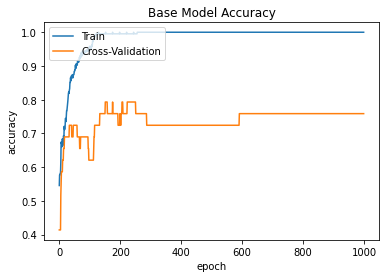

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

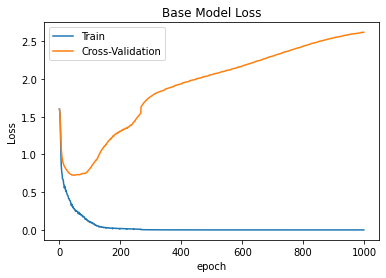

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Base Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [21]:
print('Train Split: ')
loss, accuracy = base_model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
8/8 [==============================] - 0s 927us/step - loss: 1.6954e-07 - accuracy: 1.0000
Accuracy   :  1.00 


In [22]:
print('Evaluation Split: ')
loss, accuracy =  base_model.evaluate(x_valid, y_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 2.6181 - accuracy: 0.7586 - 14ms/epoch - 14ms/step
Accuracy   :  0.76 


In [23]:
print('Test Split: ')
loss, accuracy =  base_model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1/1 - 0s - loss: 1.3892 - accuracy: 0.9286 - 15ms/epoch - 15ms/step
Accuracy   :  0.93


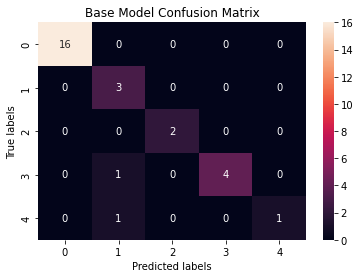

In [24]:
from sklearn.metrics import confusion_matrix

base_cm_ax = plt.subplot()
base_model_predict_results = base_model.predict(x_test)

base_model_predict_results = base_model_predict_results.argmax(axis = 1)

test_labels = y_test.to_numpy().argmax(axis = 1)

base_cm = confusion_matrix(test_labels, base_model_predict_results)

sns.heatmap(base_cm, annot=True, ax = base_cm_ax);

base_cm_ax.set_xlabel('Predicted labels');base_cm_ax.set_ylabel('True labels'); 
base_cm_ax.set_title('Base Model Confusion Matrix'); 

## Training Model with Gaussian Noise Layer

In [25]:
from tensorflow.keras.layers import GaussianNoise

def build_gaussian_model():
    model = Sequential()
    
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'sigmoid', input_shape = (x_train.shape[1], )))
    model.add(GaussianNoise(0.1, input_shape = (x_train.shape[1], )))
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(5, kernel_initializer = 'uniform', activation='softmax'))
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

EPOCHS = 1000
batch_size = 10

gaussian_model = build_gaussian_model()
print('Gaussian Model Summary:')
gaussian_model.summary()


with tf.device('/CPU:0'):
    history = gaussian_model.fit(
        x_train, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=False,
        steps_per_epoch = int(x_train.shape[0] / batch_size) ,
        validation_data = (x_valid, y_valid),   
    )

Gaussian Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 350       
                                                                 
 gaussian_noise (GaussianNoi  (None, 7)                0         
 se)                                                             
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 5)                 40        
                                                                 
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 0s 7ms/step - loss: 1.5988 - accuracy: 0.540

22/22 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8279 - val_loss: 0.7990 - val_accuracy: 0.7241
Epoch 52/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8233 - val_loss: 0.7965 - val_accuracy: 0.7241
Epoch 53/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.8465 - val_loss: 0.7927 - val_accuracy: 0.7241
Epoch 54/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8419 - val_loss: 0.7889 - val_accuracy: 0.7241
Epoch 55/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8465 - val_loss: 0.7848 - val_accuracy: 0.7241
Epoch 56/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8372 - val_loss: 0.7823 - val_accuracy: 0.7586
Epoch 57/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8419 - val_loss: 0.7786 - val_accuracy: 0.7586
Epoch 58/1000

22/22 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8837 - val_loss: 0.6744 - val_accuracy: 0.7241
Epoch 109/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9163 - val_loss: 0.6730 - val_accuracy: 0.7241
Epoch 110/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.9256 - val_loss: 0.6706 - val_accuracy: 0.7241
Epoch 111/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8977 - val_loss: 0.6690 - val_accuracy: 0.7241
Epoch 112/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8791 - val_loss: 0.6675 - val_accuracy: 0.7241
Epoch 113/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.9070 - val_loss: 0.6672 - val_accuracy: 0.7241
Epoch 114/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8930 - val_loss: 0.6664 - val_accuracy: 0.7241
Epoch 1

Epoch 165/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9302 - val_loss: 0.5740 - val_accuracy: 0.7931
Epoch 166/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9116 - val_loss: 0.5727 - val_accuracy: 0.7931
Epoch 167/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9209 - val_loss: 0.5743 - val_accuracy: 0.7931
Epoch 168/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9302 - val_loss: 0.5692 - val_accuracy: 0.7931
Epoch 169/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9349 - val_loss: 0.5650 - val_accuracy: 0.7931
Epoch 170/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9256 - val_loss: 0.5594 - val_accuracy: 0.7931
Epoch 171/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9256 - val_loss: 0.5567 - val_accuracy:

Epoch 222/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.9488 - val_loss: 0.4905 - val_accuracy: 0.8276
Epoch 223/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9535 - val_loss: 0.4908 - val_accuracy: 0.8276
Epoch 224/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9581 - val_loss: 0.4933 - val_accuracy: 0.8276
Epoch 225/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9535 - val_loss: 0.4895 - val_accuracy: 0.8276
Epoch 226/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9628 - val_loss: 0.4800 - val_accuracy: 0.8276
Epoch 227/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9581 - val_loss: 0.4804 - val_accuracy: 0.8276
Epoch 228/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9581 - val_loss: 0.4778 - val_accuracy:

Epoch 279/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9674 - val_loss: 0.4324 - val_accuracy: 0.8276
Epoch 280/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0829 - accuracy: 0.9860 - val_loss: 0.4354 - val_accuracy: 0.8276
Epoch 281/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9907 - val_loss: 0.4356 - val_accuracy: 0.8276
Epoch 282/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9814 - val_loss: 0.4397 - val_accuracy: 0.8276
Epoch 283/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9860 - val_loss: 0.4448 - val_accuracy: 0.8276
Epoch 284/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9860 - val_loss: 0.4440 - val_accuracy: 0.8276
Epoch 285/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9814 - val_loss: 0.4456 - val_accuracy:

Epoch 336/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9907 - val_loss: 0.5135 - val_accuracy: 0.8276
Epoch 337/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9907 - val_loss: 0.5095 - val_accuracy: 0.8276
Epoch 338/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9907 - val_loss: 0.4934 - val_accuracy: 0.8276
Epoch 339/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9953 - val_loss: 0.4908 - val_accuracy: 0.8276
Epoch 340/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9953 - val_loss: 0.4968 - val_accuracy: 0.8276
Epoch 341/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9907 - val_loss: 0.5100 - val_accuracy: 0.8276
Epoch 342/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9953 - val_loss: 0.5076 - val_accuracy:

Epoch 393/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.5520 - val_accuracy: 0.8276
Epoch 394/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.5469 - val_accuracy: 0.8621
Epoch 395/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.5475 - val_accuracy: 0.8621
Epoch 396/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.5472 - val_accuracy: 0.8276
Epoch 397/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.5493 - val_accuracy: 0.8276
Epoch 398/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.5590 - val_accuracy: 0.8276
Epoch 399/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9860 - val_loss: 0.5722 - val_accuracy:

Epoch 450/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.8276
Epoch 451/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.5839 - val_accuracy: 0.8276
Epoch 452/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.5917 - val_accuracy: 0.8276
Epoch 453/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 0.5909 - val_accuracy: 0.8276
Epoch 454/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.6028 - val_accuracy: 0.8276
Epoch 455/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.6223 - val_accuracy: 0.7586
Epoch 456/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.6206 - val_accuracy:

Epoch 507/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.6208 - val_accuracy: 0.8276
Epoch 508/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.6251 - val_accuracy: 0.8276
Epoch 509/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9953 - val_loss: 0.6683 - val_accuracy: 0.7931
Epoch 510/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.6532 - val_accuracy: 0.7931
Epoch 511/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9953 - val_loss: 0.6552 - val_accuracy: 0.7931
Epoch 512/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.6520 - val_accuracy: 0.7931
Epoch 513/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.6513 - val_accuracy:

Epoch 564/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6250 - val_accuracy: 0.7931
Epoch 565/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.6347 - val_accuracy: 0.7931
Epoch 566/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6416 - val_accuracy: 0.7931
Epoch 567/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.6477 - val_accuracy: 0.7931
Epoch 568/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6439 - val_accuracy: 0.7931
Epoch 569/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6396 - val_accuracy: 0.7931
Epoch 570/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6442 - val_accuracy:

Epoch 621/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.6662 - val_accuracy: 0.8276
Epoch 622/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.6837 - val_accuracy: 0.7931
Epoch 623/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6906 - val_accuracy: 0.7931
Epoch 624/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6876 - val_accuracy: 0.7931
Epoch 625/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9953 - val_loss: 0.6951 - val_accuracy: 0.7931
Epoch 626/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7058 - val_accuracy: 0.7931
Epoch 627/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.7101 - val_accuracy:

Epoch 678/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6734 - val_accuracy: 0.8276
Epoch 679/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6712 - val_accuracy: 0.8276
Epoch 680/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6680 - val_accuracy: 0.8276
Epoch 681/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6705 - val_accuracy: 0.8276
Epoch 682/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6703 - val_accuracy: 0.8276
Epoch 683/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.3987e-04 - accuracy: 1.0000 - val_loss: 0.6711 - val_accuracy: 0.8276
Epoch 684/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6793 - val_accur

22/22 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7040 - val_accuracy: 0.8276
Epoch 735/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7079 - val_accuracy: 0.8276
Epoch 736/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7119 - val_accuracy: 0.8276
Epoch 737/1000
22/22 [==============================] - 0s 2ms/step - loss: 8.0406e-04 - accuracy: 1.0000 - val_loss: 0.7136 - val_accuracy: 0.8276
Epoch 738/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.7139 - val_accuracy: 0.8276
Epoch 739/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7145 - val_accuracy: 0.8276
Epoch 740/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7235 - val_accuracy: 0.8276
Epo

22/22 [==============================] - 0s 2ms/step - loss: 8.7225e-04 - accuracy: 1.0000 - val_loss: 0.8244 - val_accuracy: 0.7931
Epoch 791/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8181 - val_accuracy: 0.7931
Epoch 792/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.8129 - val_accuracy: 0.7931
Epoch 793/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.8106 - val_accuracy: 0.7931
Epoch 794/1000
22/22 [==============================] - 0s 2ms/step - loss: 8.2882e-04 - accuracy: 1.0000 - val_loss: 0.8072 - val_accuracy: 0.7931
Epoch 795/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.2747e-04 - accuracy: 1.0000 - val_loss: 0.7993 - val_accuracy: 0.7931
Epoch 796/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.1498e-04 - accuracy: 1.0000 - val_loss: 0.7954 - val_accuracy

Epoch 846/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9953 - val_loss: 0.8514 - val_accuracy: 0.7931
Epoch 847/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.6244e-04 - accuracy: 1.0000 - val_loss: 0.8579 - val_accuracy: 0.7931
Epoch 848/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8468 - val_accuracy: 0.7931
Epoch 849/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8450 - val_accuracy: 0.7931
Epoch 850/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.2567e-04 - accuracy: 1.0000 - val_loss: 0.8432 - val_accuracy: 0.7931
Epoch 851/1000
22/22 [==============================] - 0s 2ms/step - loss: 7.0773e-04 - accuracy: 1.0000 - val_loss: 0.8407 - val_accuracy: 0.7931
Epoch 852/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.1915e-04 - accuracy: 1.0000 - val_loss: 0.8363

Epoch 902/1000
22/22 [==============================] - 0s 2ms/step - loss: 7.5615e-04 - accuracy: 1.0000 - val_loss: 0.7639 - val_accuracy: 0.8276
Epoch 903/1000
22/22 [==============================] - 0s 2ms/step - loss: 6.2909e-04 - accuracy: 1.0000 - val_loss: 0.7665 - val_accuracy: 0.8276
Epoch 904/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.9059e-04 - accuracy: 1.0000 - val_loss: 0.7663 - val_accuracy: 0.8276
Epoch 905/1000
22/22 [==============================] - 0s 2ms/step - loss: 7.6226e-04 - accuracy: 1.0000 - val_loss: 0.7736 - val_accuracy: 0.8276
Epoch 906/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.6934e-04 - accuracy: 1.0000 - val_loss: 0.7743 - val_accuracy: 0.8276
Epoch 907/1000
22/22 [==============================] - 0s 2ms/step - loss: 4.2334e-04 - accuracy: 1.0000 - val_loss: 0.7752 - val_accuracy: 0.8276
Epoch 908/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.7911e-04 - accuracy: 1.0000 - val_

22/22 [==============================] - 0s 2ms/step - loss: 8.8699e-04 - accuracy: 1.0000 - val_loss: 0.8728 - val_accuracy: 0.7931
Epoch 958/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.7496e-04 - accuracy: 1.0000 - val_loss: 0.8724 - val_accuracy: 0.7931
Epoch 959/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.5609e-04 - accuracy: 1.0000 - val_loss: 0.8666 - val_accuracy: 0.7931
Epoch 960/1000
22/22 [==============================] - 0s 2ms/step - loss: 3.0533e-04 - accuracy: 1.0000 - val_loss: 0.8660 - val_accuracy: 0.7931
Epoch 961/1000
22/22 [==============================] - 0s 2ms/step - loss: 5.5347e-04 - accuracy: 1.0000 - val_loss: 0.8829 - val_accuracy: 0.7931
Epoch 962/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.9480e-04 - accuracy: 1.0000 - val_loss: 0.8902 - val_accuracy: 0.7931
Epoch 963/1000
22/22 [==============================] - 0s 2ms/step - loss: 2.1278e-04 - accuracy: 1.0000 - val_loss: 0.8917 - 

In [26]:
print('Summary of the gaussian layer model results after each epoch: ')
gaussian_hist = pd.DataFrame(history.history)
gaussian_hist['epoch'] = history.epoch
gaussian_hist.tail()

Summary of the gaussian layer model results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
995,0.000328,1.0,0.838564,0.827586,995
996,0.000463,1.0,0.839569,0.827586,996
997,0.001199,1.0,0.841355,0.827586,997
998,0.002972,1.0,0.850763,0.827586,998
999,0.000378,1.0,0.829371,0.827586,999


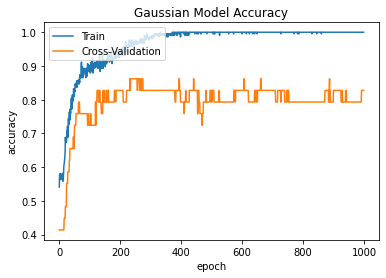

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Gaussian Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

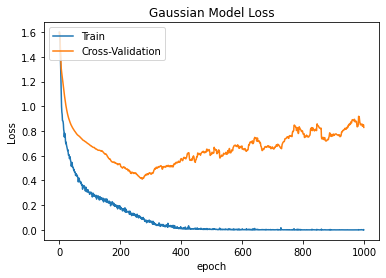

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Gaussian Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [29]:
print('Train Split: ')
loss, accuracy = gaussian_model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
8/8 [==============================] - 0s 957us/step - loss: 6.7366e-05 - accuracy: 1.0000
Accuracy   :  1.00 


In [30]:
print('Evaluation Split: ')
loss, accuracy =  gaussian_model.evaluate(x_valid, y_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 0.8294 - accuracy: 0.8276 - 17ms/epoch - 17ms/step
Accuracy   :  0.83 


In [31]:
print('Test Split: ')
loss, accuracy =  gaussian_model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1/1 - 0s - loss: 0.3850 - accuracy: 0.9286 - 15ms/epoch - 15ms/step
Accuracy   :  0.93


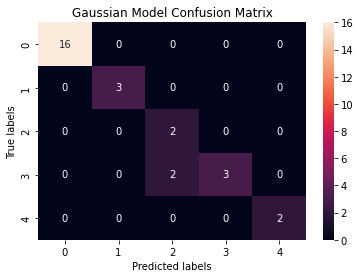

In [32]:
from sklearn.metrics import confusion_matrix

gaussian_cm_ax = plt.subplot()
gaussian_model_predict_results = gaussian_model.predict(x_test)

gaussian_model_predict_results = gaussian_model_predict_results.argmax(axis = 1)

test_labels = y_test.to_numpy().argmax(axis = 1)

gaussian_cm = confusion_matrix(test_labels, gaussian_model_predict_results)

sns.heatmap(gaussian_cm, annot=True, ax = gaussian_cm_ax);

gaussian_cm_ax.set_xlabel('Predicted labels');gaussian_cm_ax.set_ylabel('True labels'); 
gaussian_cm_ax.set_title('Gaussian Model Confusion Matrix'); 

In [33]:
# A transformation function needs to be made from the information we've got through the confusion matrix this is a test model

trans_dict = dict()

import numpy as np

cm = np.array([ [11, 1, 0, 0, 0], [4, 1, 0, 1, 2], [1, 0, 1, 0, 0], [0, 0, 1, 1, 2], [1, 0, 0, 1, 0] ])

total_correct = 0

for i in range(5):
    trans_dict[i] = dict()
    total_correct += cm[i][i]
    trans_dict[i]['correct_pred'] = cm[i][i]
    trans_dict[i]['wrong_pred'] = sum(cm[i][:i]) + sum(cm[i][i+1:])
    if cm[i][i] == np.max(cm[i]):
        trans_dict[i]['high'] = True
        temp = np.delete(cm[i], i)
        trans_dict[i]['high_value'] = max(temp)
    else:
        trans_dict[i]['high'] = False
        trans_dict[i]['high_value'] = max(cm[i])

for key in trans_dict:
    trans_dict[key]['reg_f'] = (total_correct - trans_dict[key]['correct_pred'])*2 + \
    ((trans_dict[key]['wrong_pred'] - trans_dict[key]['high_value'])//2 + trans_dict[key]['high_value'])//2
        

trans_dict

{0: {'correct_pred': 11,
  'wrong_pred': 1,
  'high': True,
  'high_value': 1,
  'reg_f': 6},
 1: {'correct_pred': 1,
  'wrong_pred': 7,
  'high': False,
  'high_value': 4,
  'reg_f': 28},
 2: {'correct_pred': 1,
  'wrong_pred': 1,
  'high': True,
  'high_value': 1,
  'reg_f': 26},
 3: {'correct_pred': 1,
  'wrong_pred': 3,
  'high': False,
  'high_value': 2,
  'reg_f': 27},
 4: {'correct_pred': 0,
  'wrong_pred': 2,
  'high': False,
  'high_value': 1,
  'reg_f': 28}}